<h1><b>📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression</b></h1>
<h4><b>Course:</b> Data Analytics with Python</h4>
<h4><b>Student: </b> John Marc A. De Villa</h4>
<br>
<hr>

<h4><b>Instructor: </b> Leonard Andrew Mesiera</h4>
<br>






<h2><b>🛠️ Part 1: Setup and Data Loading</b></h2>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

DSS = pd.read_csv('/content/Data Science Salary 2021 to 2023.csv')

DSS.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [121]:
DSS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [134]:
DSS.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
company_location,object
company_size,object
experience_level_encoded,int64


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

<h2><b>🔍 Part 2: Exploratory Data Analysis (EDA)</b></h2>

<ol>
<li><h4>How many unique job titles are there?</h4></li>
</ol>

In [123]:
DSS['job_title'].unique()

array(['Applied Scientist', 'Data Quality Analyst',
       'Compliance Data Analyst', 'Machine Learning Engineer',
       'Research Scientist', 'Data Engineer', 'Data Analyst',
       'Data Scientist', 'BI Data Engineer', 'Research Engineer',
       'Business Data Analyst', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Scientist', 'AI Programmer',
       'AI Developer', 'Computer Vision Engineer', 'BI Developer',
       'Big Data Engineer', 'Deep Learning Engineer', 'Head of Data',
       'Analytics Engineer', 'Data Architect', 'Director of Data Science',
       'Head of Data Science', 'Data Analytics Manager', 'ML Engineer',
       'Applied Machine Learning Engineer', 'Applied Data Scientist',
       'ETL Engineer', 'Data Specialist', 'Lead Data Analyst',
       'Data Manager', 'Machine Learning Scientist', 'MLOps Engineer',
       'Financial Data Analyst', 'Software Data Engineer',
       'Data Science Manager', 'Data Science Consultant',
       'Machine Learning 

In [124]:
DSS['job_title'].nunique()

93

<h2><b>Answer:</b></h2>

<h3>There are <b>93 unique job titles</b> that the dataset have.</h3>

<hr>

<h2><b>🔍 Part 2: Exploratory Data Analysis (EDA)</b></h2>

<ol start = 2>
<h4><li>What is the average salary <code>salary_in_usd</code> per <code>work_year</code>?</li></h4>
</ol>

In [125]:
DSS.groupby('work_year')['salary_in_usd'].mean()

,salary_in_usd
work_year,
2020,92302.631579
2021,94087.208696
2022,133379.510804
2023,148954.558413


<h2><b>Answer:</b></h2>

<h3>The average usd salary per work year are:</h3>
<table border="1" cellpadding="10" cellspacing="5" width="40%">
<thead>
<tr>
<th>Work Year</th>
 <th>Salary in Usd</th>
 </tr>
 <tbody>
    <tr>
      <td><b>2020</b></td>
      <td>92,302.631579</td>
    </tr>
    <tr>
    <td><b>2021</b></td>
    <td>94,087.208696</td>
    </tr>
    <tr>
    <td><b>2022</b></td>
    <td>133,379.510804</td>
    </tr>
    <tr>
    <td><b>2023</b></td>
    <td>148,954.558413</td>
    </tr>
</tr>
</table>
<hr>

<h2><b>🔍 Part 2: Exploratory Data Analysis (EDA)</b></h2>

<ol start = 3>
<h4><li>Create a bar plot showing average salary by <code>experience_level</code>?</li></h4>
</ol>

In [126]:
DSS['experience_level'].unique()

array(['EN', 'EX', 'MI', 'SE'], dtype=object)

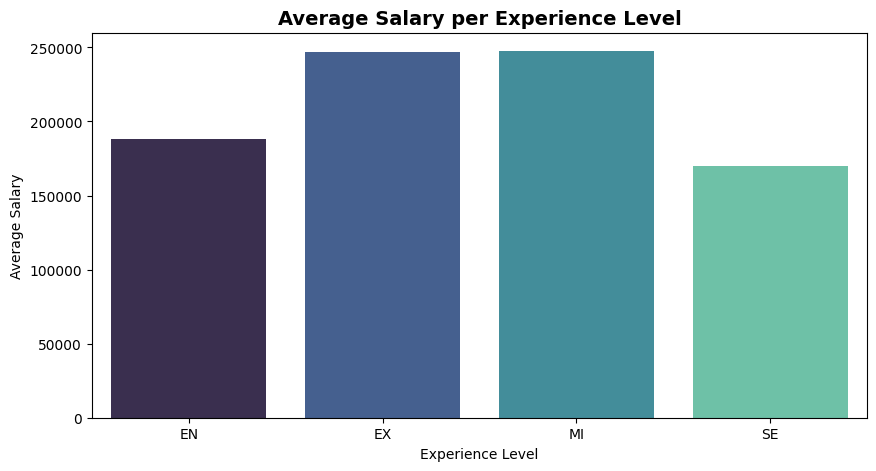

In [127]:
exp_ave_slry = DSS.groupby('experience_level')['salary'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=exp_ave_slry,
    x='experience_level',
    y='salary',
    palette='mako',
)

plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salary per Experience Level', fontsize=14, fontweight='bold')
plt.show()

<h2><b>Answer</b></h2>
<h4><i>Above shows the bargraph about the Average salary per experience level.</i></h4>

<hr>

<h2><b>🧹 Part 3: Data Preprocessing for Linear Regression</b></h2>

In [128]:
le = LabelEncoder()
DSS['experience_level_encoded'] = le.fit_transform(DSS['experience_level'])

features = ['work_year', 'experience_level_encoded']
X = DSS[features]
y = DSS['salary_in_usd']

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


<h2><b>📈 Part 4: Train a Linear Regression Model</b></h2>


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


<h2><b>🔮 Part 5: Predict 2024 Salaries</b></h2>

In [139]:
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

predicted_salaries = model.predict(future_data)

results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


<h2><b>📝 Part 6: Reflection</b></h2>

<ol><h3>
<li>Does your model make reasonable predictions?</li>
  <ul>
      <li><i>Yes, the model is reasonable because its predictions align with our expectations. This shows that it performs accurately and produces reliable outcomes.</i></li>
  </ul>
<li>What are the limitations of using only <code>work_year</code> and <code>experience_level</code> ?</li>
  <ul>
    <li><i>Since the model only uses two features, its predictions might not be very accurate or reliable. Adding more factors can help improve the results because elements such as the economy, regional pay differences, and yearly bonuses can also influence the data.</i></li>
    </ul>
<li>How could you improve this model? (Think: more features, better encoding,etc.)</li>
  <ul>
    <li><i>To make the model better, we can try different approaches to get more accurate results. We can also use cross-validation and create another dataframe to study certain values using different codes.</i></li>
  </ul>
<li>Why is <b>R<sup>2</sup> not enough</b> to trust your predictions?</li>
  <ul>
    <li><i>R <sup>2</sup> alone isn’t enough to trust a model’s predictions because it only shows how well the model fits the data, not how well it predicts new results. I found in my research that R² has weak explanatory power, so it can’t be fully trusted. It’s better to also check other metrics like MAE, RMSE, and use cross-validation for more reliable results</i></li>
  </ul>
</h3></ol>